In [2]:
# Load inistial libraries
library(ggplot2)
library(reshape2)
library(RColorBrewer)
library(outliers)


In [3]:
# Second Part (Exploratory Analysis)
# Subjects Vital Signs on Day of Visit Dataframe

headers_VS <- read.csv(file="VS.txt", sep="\t", header = F, nrows = 1, as.is = T)
df_VS <- read.csv(file="VS.txt", sep="\t", skip = 1, header = F)
colnames(df_VS)<- headers_VS
df_VS$NDate <- as.POSIXct(paste0(df_VS$Date_Perf, df_VS$Time_Perf),format="%m/%d/%Y %H:%M:%S")
df_VS$SITE <- as.factor(df_VS$SITE)
df_VS$SUBJ <- as.factor(df_VS$SUBJ)
df_VS$VISIT_NUM <- as.factor(df_VS$VISIT_NUM)
df_VS$SubjectID <- as.factor(paste0(df_VS$SITE, "-", df_VS$SUBJ))
df_VS$Date_Perf <- as.Date(df_VS$Date_Perf, format="%m/%d/%Y")
# Create single columns in the English and Metric systems for Temperature and Weight
df_VS$TEMP_F <- ifelse(!is.na(df_VS$TEMP) & df_VS$TEMP_Unit == "C", df_VS$TEMP * 1.8 + 32, df_VS$TEMP)
df_VS$WT_LB<- ifelse(!is.na(df_VS$WT) & df_VS$WT_Unit == "kg", df_VS$WT*2.2046, df_VS$WT)
df_VS$TEMP_C <- ifelse(!is.na(df_VS$TEMP) & df_VS$TEMP_Unit == "F", (df_VS$TEMP - 32.0)/1.8, df_VS$TEMP)
df_VS$WT_kg<- ifelse(!is.na(df_VS$WT) & df_VS$WT_Unit == "LB", df_VS$WT*0.45359237, df_VS$WT)

In [35]:
# Subjects's Vital Signs data characteristics

# Eliminate duplicated entries
df_VS.unique <- df_VS[!duplicated(df_VS), ]

# Eliminate NA's on remaining dataset
df_VS.filtered <- na.omit(df_VS[!duplicated(df_VS), ])

#head(df_VS)
#str(df_VS)
#summary(df_VS)
#str(df_VS.unique)
str(df_VS.filtered)



'data.frame':	308 obs. of  23 variables:
 $ SITE       : Factor w/ 15 levels "1432","1459",..: 13 13 13 13 13 13 13 13 13 2 ...
 $ SUBJ       : Factor w/ 249 levels "2945","3014",..: 59 4 52 64 64 70 21 21 20 7 ...
 $ VISIT_NUM  : Factor w/ 12 levels "1","2","3","4",..: 7 7 7 7 8 7 7 8 7 7 ...
 $ Date_Perf  : Date, format: "2017-04-20" "2017-04-04" ...
 $ Time_Perf  : Factor w/ 517 levels "10:00:00","10:02:00",..: 273 228 173 49 14 31 468 445 203 43 ...
 $ TEMP       : num  98.4 98.4 98.4 100 99.1 97.9 99.5 98.5 98.6 98.4 ...
 $ TEMP_Unit  : Factor w/ 2 levels "C","F": 2 2 2 2 2 2 2 2 2 2 ...
 $ PULSE      : int  74 90 70 75 80 67 102 96 80 77 ...
 $ PULSE_Unit : Factor w/ 1 level "beats/min": 1 1 1 1 1 1 1 1 1 1 ...
 $ RESP       : int  16 17 16 16 16 17 16 16 16 19 ...
 $ RESP_Unit  : Factor w/ 1 level "breaths/min": 1 1 1 1 1 1 1 1 1 1 ...
 $ SYSTOL     : int  121 130 147 135 135 121 129 119 130 119 ...
 $ SYSTOL_Unit: Factor w/ 1 level "mmHg": 1 1 1 1 1 1 1 1 1 1 ...
 $ DIAST      

### VS.txt file description

The original file has 7,608 entry lines, there are many duplicated lines.

After eliminating the duplicated lines we end up with 2,796 (63% of the entries of the original file were duplicated).

There are many NA in the entries. If we eliminate all lines that have NA we finish only with 308 entries. 
This represents only 4% of the original file. 

Of the complete available data, there is only available information from 2 visits: Visit 12 and Visit 13


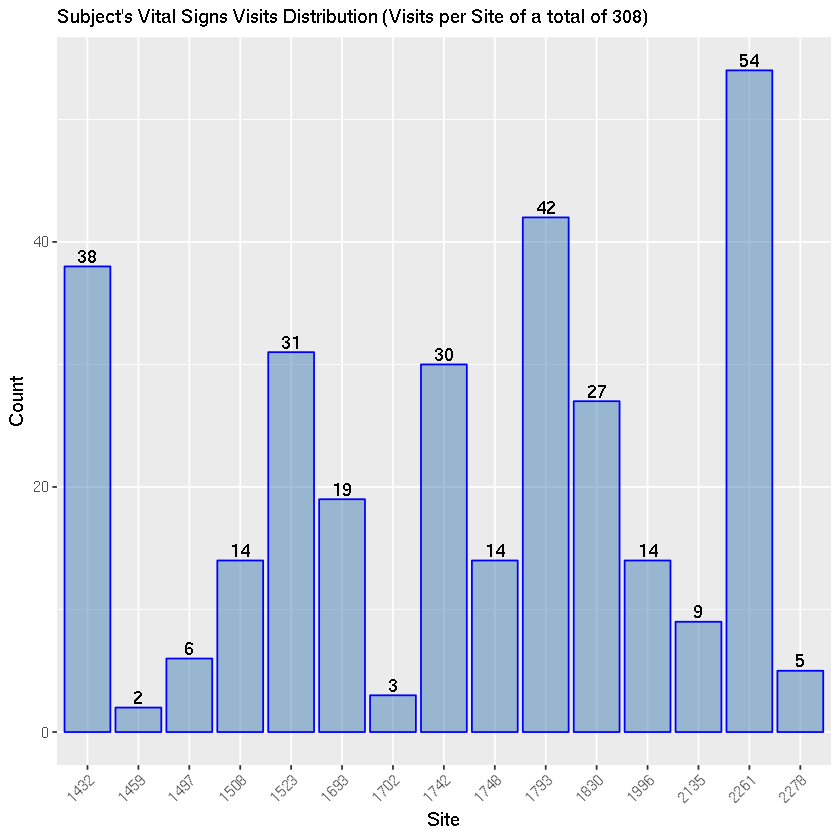

In [5]:
# Plot Subjects Visits per Site

p <- ggplot(df_VS.filtered, aes(SITE)) 
p <- p + labs(title="Subject's Vital Signs Visits Distribution (Visits per Site of a total of 308)") +
  labs(x="Site", y="Count") 
p <- p + geom_bar(color="blue",fill="steelblue", alpha=0.5) 
p <- p + theme(axis.text.x=element_text(angle = 45, hjust = 1))
p <- p + geom_text(stat='count', aes(label=..count..), vjust=-0.25)
print(p)

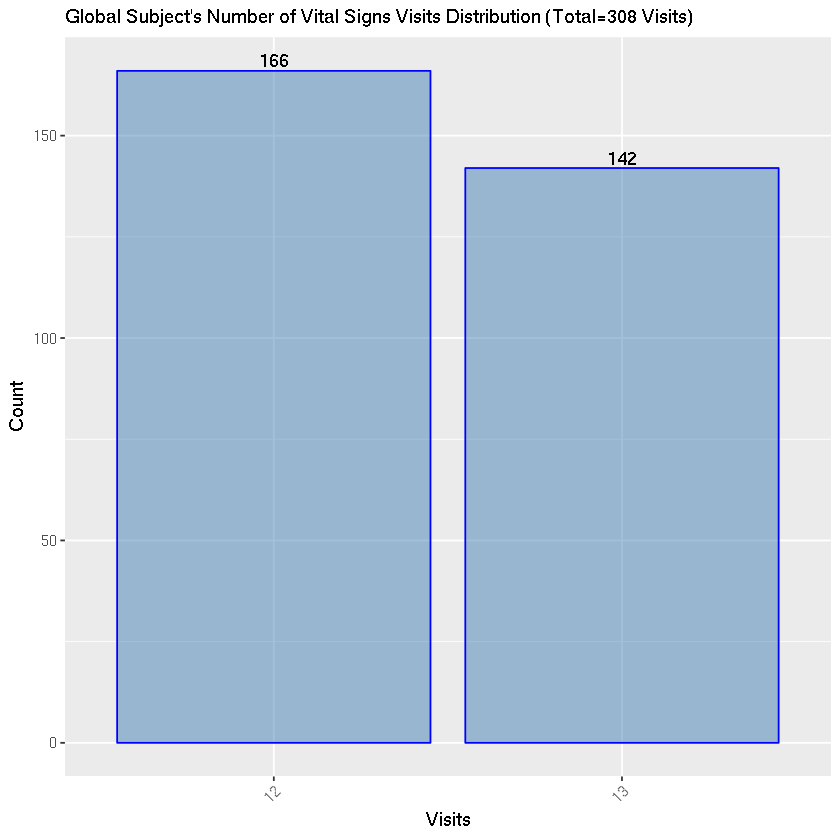

In [6]:
# Plot Subjects visits per visit date.

q <- ggplot(df_VS.filtered, aes(VISIT_NUM)) 
q <- q + labs(title="Global Subject's Number of Vital Signs Visits Distribution (Total=308 Visits)") +
  labs(x="Visits", y="Count") 
q <- q + geom_bar(color="blue",fill="steelblue", alpha=0.5) 
q <- q + theme(axis.text.x=element_text(angle = 45, hjust = 1))
q <- q + geom_text(stat='count', aes(label=..count..), vjust=-0.25)
print(q)

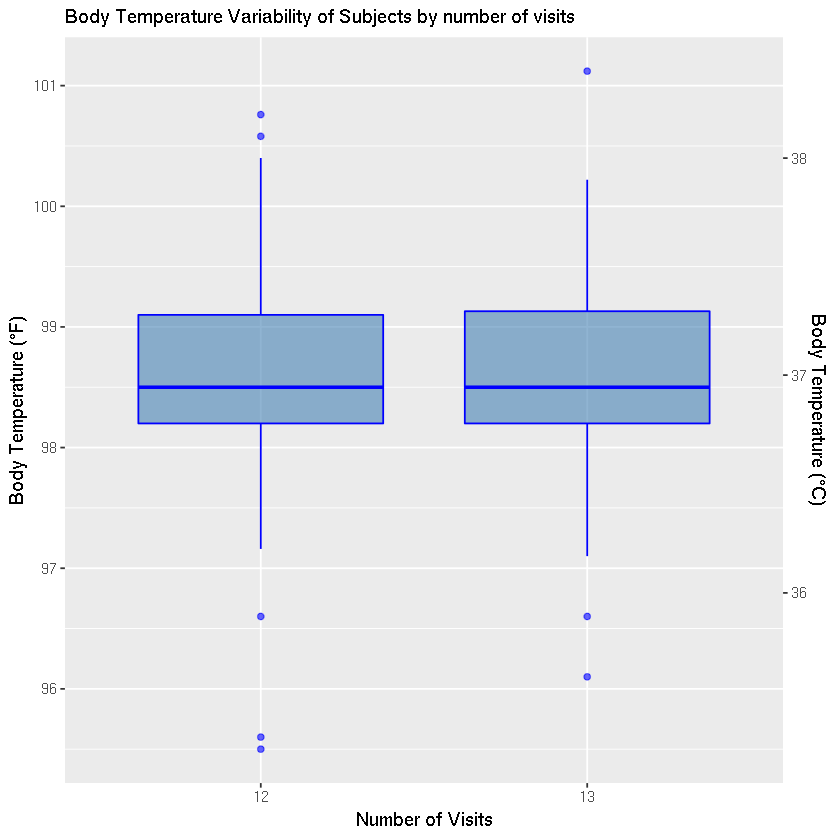

In [7]:
# Explore the temperature data entries

p2 <- ggplot(df_VS.filtered, aes(x=VISIT_NUM, y=TEMP_F)) 
p2 <- p2 + geom_boxplot(color="blue", fill="steelblue", alpha=0.6)
p2 <- p2 + labs(x="Number of Visits", y="Body Temperature (°F)") +
      labs(title="Body Temperature Variability of Subjects by number of visits")
p2 <- p2 + scale_y_continuous(sec.axis = sec_axis(~(.-32.0)/1.8, name = "Body Temperature (°C)"))
print(p2)


[1] "Identifying Subjects with possible Outliers outside percentiles range between 2% and 99%"

     SITE SUBJ VISIT_NUM TEMP_F   TEMP_C
447  1693 3115        12 100.58 38.10000
674  1693 3903        12 100.76 38.20000
5560 1830 4081        12 100.40 38.00000
5922 2278 4848        12 100.40 38.00000
6174 1748 4459        12  96.60 35.88889
6278 1748 4475        12  95.60 35.33333
6305 1748 4538        12  97.16 36.20000
6421 1748 4751        12  95.50 35.27778


[1] "Results from outlier function."

[1] 95.5

[1] 100.76

[1] "mean=  98.6  stddev=  0.78"

[1] "Identifying Subjects with possible Outliers outside percentiles range between 2% and 98%"

     SITE SUBJ VISIT_NUM TEMP_F   TEMP_C
282  1693 3705        13 101.12 38.40000
378  1693 3838        13 100.22 37.90000
4941 1523 4094        13  96.60 35.88889
5972 2278 4204        13 100.22 37.90000
6230 1748 4213        13  96.10 35.61111


[1] "Results from outlier function."

[1] 101.12

[1] 96.1

[1] "mean=  98.53  stddev=  0.75"

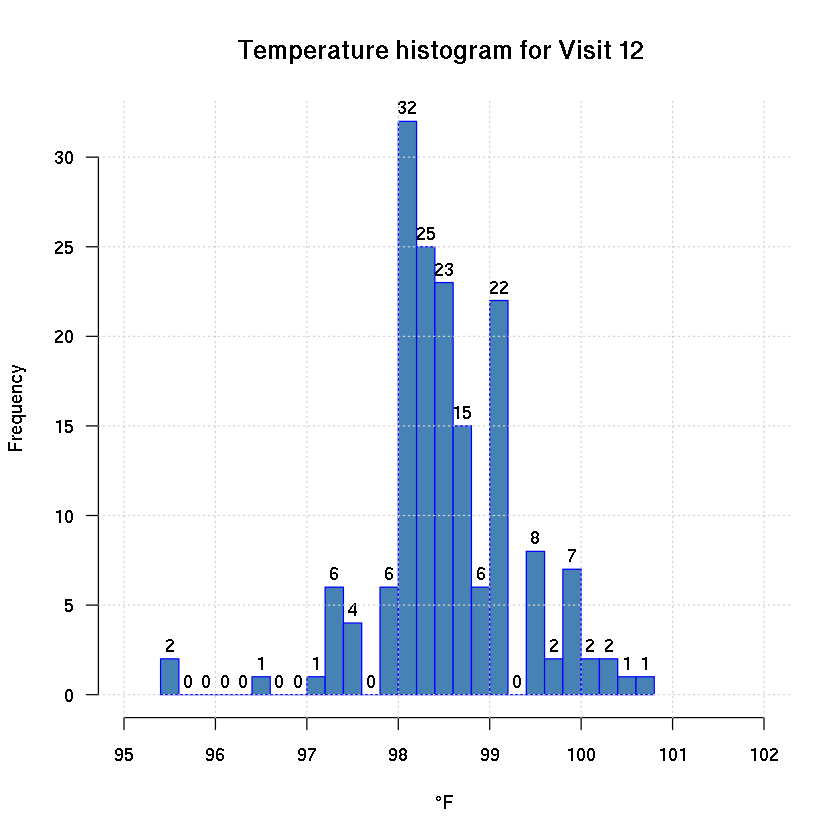

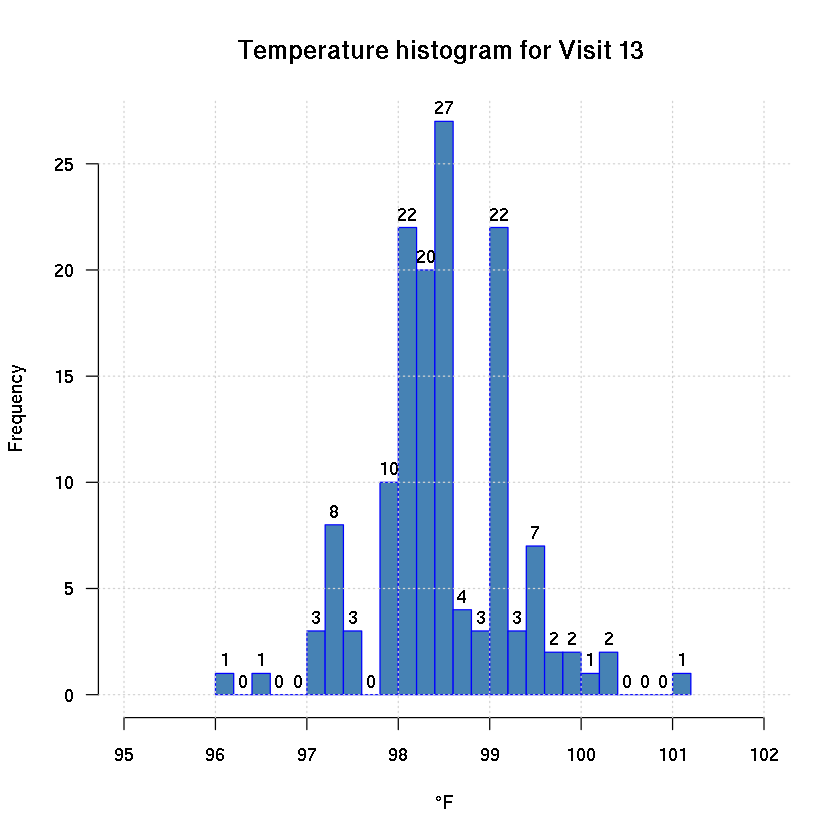

In [36]:

#for (i in unique(unlist(df_VS$VISIT_NUM, use.names = FALSE))){

   # Outlier identification

    btemp1 <- subset(df_VS.filtered, VISIT_NUM == 12, select=c(TEMP_F)) 


    Q1 <- as.numeric(quantile(btemp1$TEMP_F, c(0.02, 0.98)))

   paste("Identifying Subjects with possible Outliers outside percentiles range between 2% and 99%")
   Output1 <- subset(df_VS.filtered, VISIT_NUM == 12 & (TEMP_F < Q1[1] | TEMP_F > Q1[2]), select=c(SITE, SUBJ, VISIT_NUM, TEMP_F, TEMP_C))
   print(Output1)

   #print(scores(btemp1$TEMP_F))
   #print(scores(btemp1$TEMP, type="z", prob=0.98))
   paste("Results from outlier function.")
   outlier(btemp1$TEMP_F)
   outlier(btemp1$TEMP_F, opposite=TRUE)

   # Compute sample Mean and StdDev
   data <- btemp1$TEMP_F
   paste('mean= ', round(mean(data), digits=2), ' stddev= ',round(sd(data), digits=2))


   btemp2 <- subset(df_VS.filtered, VISIT_NUM == 13, select=c(TEMP_F)) 

    Q2 <- as.numeric(quantile(btemp2$TEMP_F, c(0.02, 0.98)))

   paste("Identifying Subjects with possible Outliers outside percentiles range between 2% and 98%")
   Output2 <- subset(df_VS.filtered, VISIT_NUM == 13 & (TEMP_F < Q2[1] | TEMP_F > Q2[2]), select=c(SITE, SUBJ, VISIT_NUM, TEMP_F, TEMP_C))
   print(Output2)
 
   
   paste("Results from outlier function.")
   outlier(btemp2$TEMP_F)
   outlier(btemp2$TEMP_F, opposite=TRUE)


   # Compute sample Mean and StdDev
   data <- btemp2$TEMP_F
   paste('mean= ', round(mean(data),digits=2), ' stddev= ',round(sd(data), digits=2))

# Create Histograms to explore data
hist(btemp1$TEMP_F, 
     main="Temperature histogram for Visit 12 ", 
     xlab="°F", 
     border="blue", 
     col="steelblue",
     xlim=c(95,102),
     las=1, 
     breaks=25, labels = TRUE)
     grid()

hist(btemp2$TEMP_F, 
     main="Temperature histogram for Visit 13 ", 
     xlab="°F", 
     border="blue", 
     col="steelblue",
     xlim=c(95,102),
     las=1, 
     breaks=25, labels = TRUE)
     grid()

#    }

### Body Temperature Outliers

Thes outliers appear to very close. There appear have been device malfunction, or incomplete procedure.
There may have been other reasons. Probably is good to check this subjects. 

There were 5 subjects during their Visit 12, their temperature were outside the limits: 3115, 3903 (T above) and 4459, 4475 and 4751 (T below). 

During their Visit 13, we find only 3 cases: Subjects 3705 (T above) and 4094, 4213 (T below)


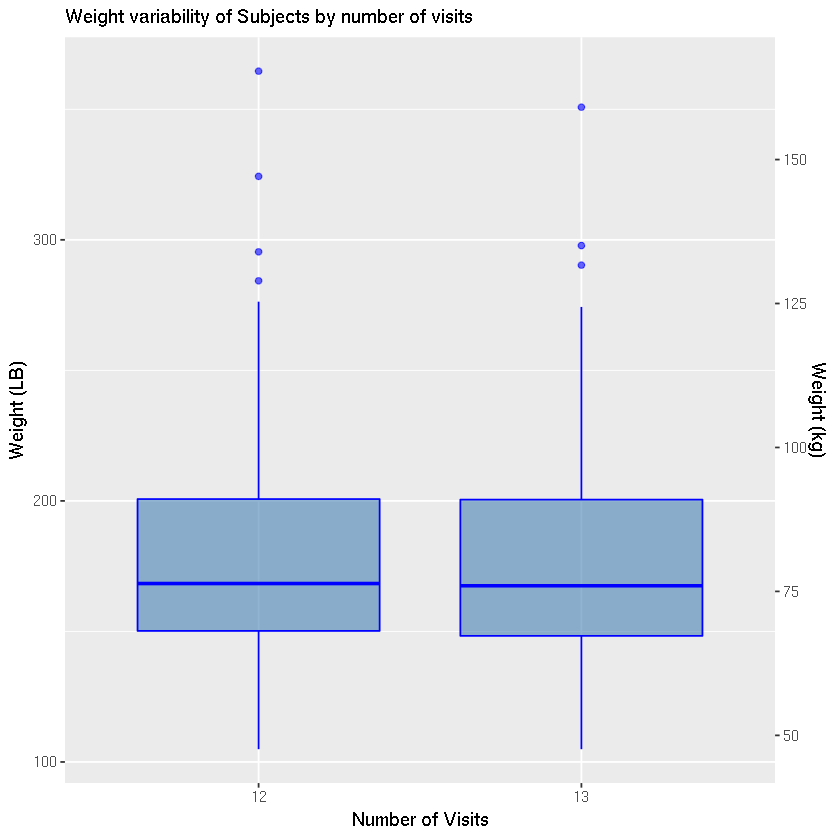

In [10]:
#E Explore the weight dataset

q2 <- ggplot(df_VS.filtered, aes(x=VISIT_NUM, y=WT_LB)) 
q2 <- q2 + geom_boxplot(color="blue", fill="steelblue", alpha=0.6)
q2 <- q2 + labs(x="Number of Visits", y="Weight (LB)") +
      labs(title="Weight variability of Subjects by number of visits")

q2 <- q2 + scale_y_continuous(sec.axis = sec_axis(~.*0.45359237, name = "Weight (kg)"))
print(q2)

[1] "Identifying Subjects with possible Outliers outside percentiles range between 1% and 98%"

     SITE SUBJ VISIT_NUM WT_LB     WT_kg
1025 1508 3635        12 324.3 147.10001
1157 1432 3506        12 104.9  47.58184
5022 1523 4348        12 118.5  53.75070
6582 1742 4473        12 284.3 128.95631
7507 1996 4065        12 364.6 165.37978
7552 1996 3965        12 295.4 133.99119


[1] "Results from outlier function."

[1] 364.6

[1] 104.9

[1] "mean=  179.99  stddev=  42.09"

[1] "Identifying Subjects with possible Outliers outside percentiles renge between 1% and 98%"

     SITE SUBJ VISIT_NUM WT_LB     WT_kg
1169 1432 3506        13 104.9  47.58184
5034 1523 4348        13 114.1  51.75489
6594 1742 4473        13 290.3 131.67787
7519 1996 4065        13 350.8 159.12020
7564 1996 3965        13 297.8 135.07981


[1] "Results from outlier function."

[1] 350.8

[1] 104.9

[1] "mean=  179.54  stddev=  42.33"

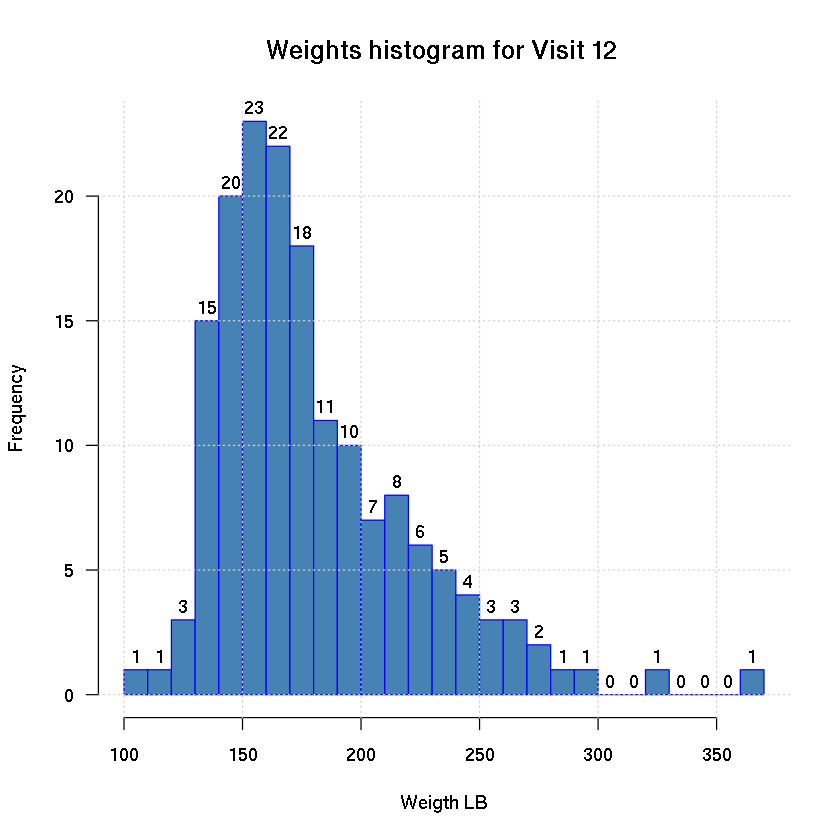

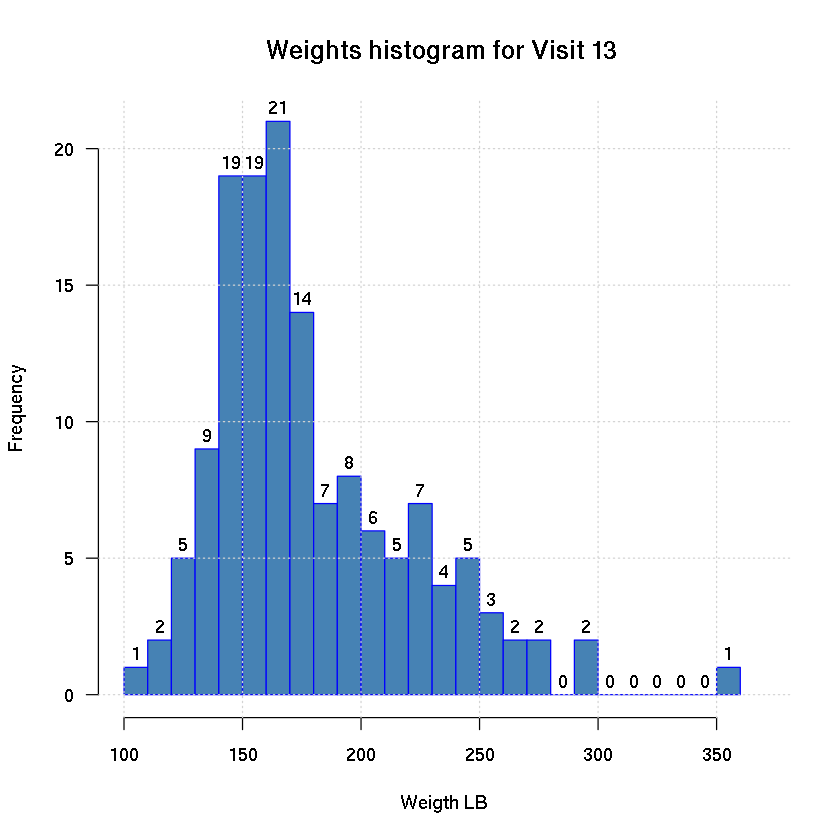

In [32]:
bwt1 <- subset(df_VS.filtered, VISIT_NUM == 12, select=c(WT_LB)) 


    Q1 <- as.numeric(quantile(bwt1$WT_LB, c(0.01, 0.98)))

   paste("Identifying Subjects with possible Outliers outside percentiles range between 1% and 98%")
   Output1 <- subset(df_VS.filtered, VISIT_NUM == 12 & (WT_LB < Q1[1] | WT_LB > Q1[2]), select=c(SITE, SUBJ, VISIT_NUM, WT_LB, WT_kg))
   print(Output1)

   paste("Results from outlier function.")
   outlier(bwt1$WT_LB)
   outlier(bwt1$WT_LB, opposite=TRUE)

# Compute sample Mean and StdDev
   data <- bwt1$WT_LB
   paste('mean= ', round(mean(data), digits=2), ' stddev= ',round(sd(data), digits=2))

   bwt2 <- subset(df_VS.filtered, VISIT_NUM == 13, select=c(WT_LB)) 


    Q2 <- as.numeric(quantile(bwt2$WT_LB, c(0.01, 0.98)))

   paste("Identifying Subjects with possible Outliers outside percentiles renge between 1% and 98%")
   Output2 <- subset(df_VS.filtered, VISIT_NUM == 13 & (WT_LB < Q2[1] | WT_LB > Q2[2]), select=c(SITE, SUBJ, VISIT_NUM, WT_LB, WT_kg))
   print(Output2)

   paste("Results from outlier function.")
   outlier(bwt2$WT_LB)
   outlier(bwt2$WT_LB, opposite=TRUE)

# Compute sample Mean and StdDev
   data <- bwt2$WT_LB
   paste('mean= ', round(mean(data), digits=2), ' stddev= ',round(sd(data), digits=2))

# Plot histograms to see data frequency distribution
hist(bwt1$WT_LB, 
     main="Weights histogram for Visit 12 ", 
     xlab="Weigth LB", 
     border="blue", 
     col="steelblue",
     xlim=c(100,370),
     las=1, 
     breaks=25, labels = TRUE)
     grid()

hist(bwt2$WT_LB, 
     main="Weights histogram for Visit 13 ", 
     xlab="Weigth LB", 
     border="blue", 
     col="steelblue",
     xlim=c(100,370),
     las=1, 
     breaks=25, labels = TRUE)
     grid()

In [142]:
# Subject failed to appear in follow up Visits
print(subset(df_VS.filtered, VISIT_NUM == 12 & SUBJ == 3635, select=c(WT_LB, WT_kg)))
print(subset(df_VS.filtered, VISIT_NUM == 13 & SUBJ == 3635, select=c(WT_LB, WT_kg)))

     WT_LB WT_kg
1025 324.3 147.1
[1] WT_LB WT_kg
<0 rows> (or 0-length row.names)


### Weight Outliers

These outliers have possible explanation. They appear to be real data.

Checking the data, it can be found that 3 subjects 3965, 4065 and 4473 have weights above 
the range of 98% of the rest of the subjects population. They appear in both visits with similar 
weights. 

Subject 3635 only attends Visit 12, but misses to appear on Visit 13. This is the reason that only 
appears once.  


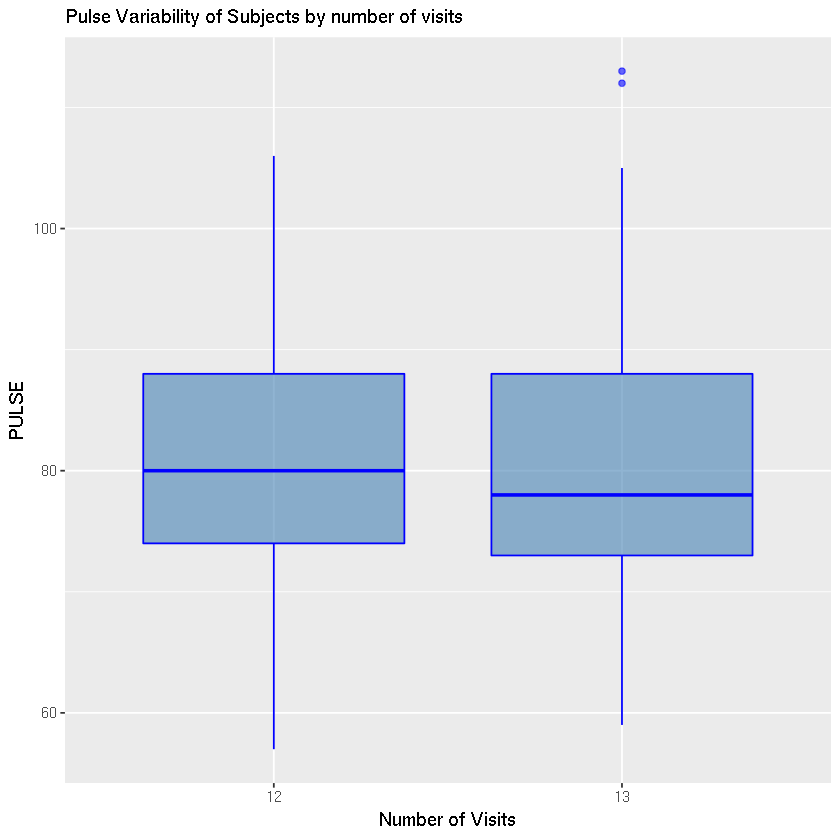

In [153]:
# Explore pulse data 

p2 <- ggplot(df_VS.filtered, aes(x=VISIT_NUM, y=PULSE)) 
p2 <- p2 + geom_boxplot(color="blue", fill="steelblue", alpha=0.6)
p2 <- p2 + labs(x="Number of Visits", y="PULSE") +
      labs(title="Pulse Variability of Subjects by number of visits")
print(p2)


[1] "Identifying Subjects with possible Outliers outside percentiles range between 1% and 98%"

     SITE SUBJ VISIT_NUM PULSE
1609 1432 3459        12    61
2421 2261 3668        12   106
5536 1830 4548        12    57


[1] "Results from outlier function."

[1] 106

[1] 57

[1] "mean=  80.47  stddev=  10.49"

[1] "Identifying Subjects with possible Outliers outside percentiles renge between 1% and 98%"

     SITE SUBJ VISIT_NUM PULSE
885  1508 3689        13    59
6793 1742 4417        13   113
7038 1742 5009        13   112


[1] "Results from outlier function."

[1] 113

[1] 59

[1] "mean=  80.04  stddev=  11.22"

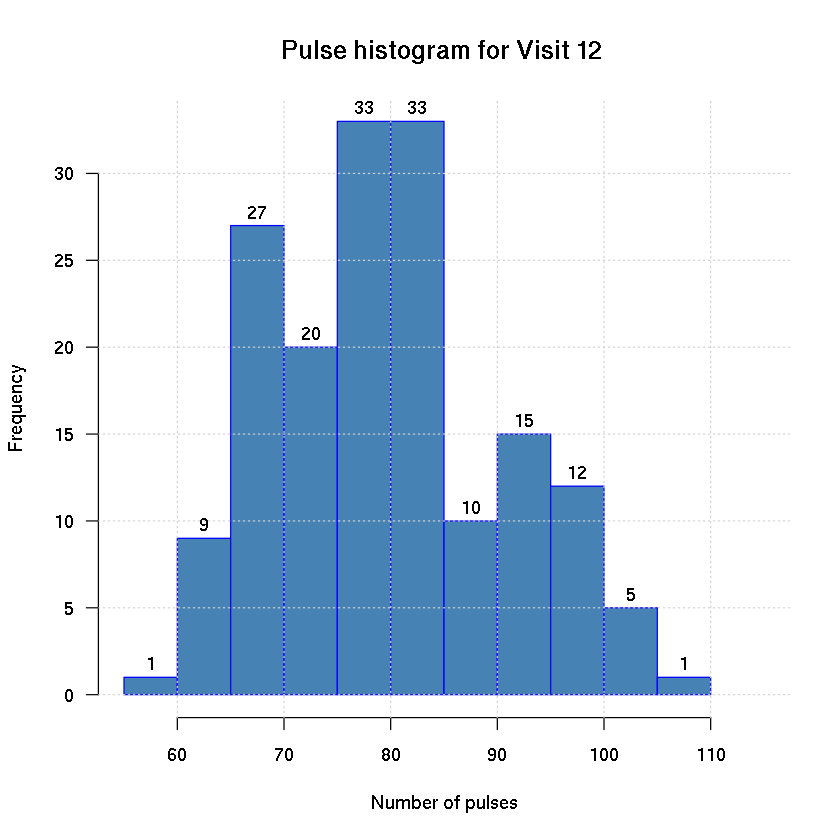

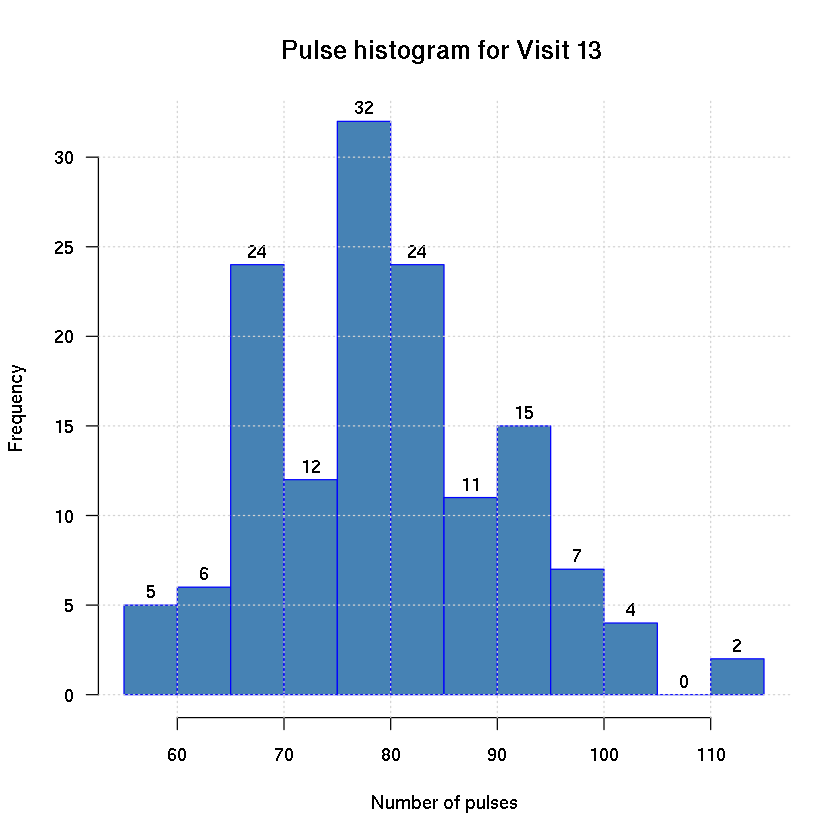

In [33]:
pulse1 <- subset(df_VS.filtered, VISIT_NUM == 12, select=c(PULSE)) 
pulse2 <- subset(df_VS.filtered, VISIT_NUM == 13, select=c(PULSE)) 


    Q1 <- as.numeric(quantile(pulse1$PULSE, c(0.01, 0.98)))

   paste("Identifying Subjects with possible Outliers outside percentiles range between 1% and 98%")
   Output1 <- subset(df_VS.filtered, VISIT_NUM == 12 & (PULSE < Q1[1] | PULSE > Q1[2]), select=c(SITE, SUBJ, VISIT_NUM, PULSE))
   print(Output1)

   paste("Results from outlier function.")
   outlier(pulse1$PULSE)
   outlier(pulse1$PULSE, opposite=TRUE)

# Compute sample Mean and StdDev
   data <- pulse1$PULSE
   paste('mean= ', round(mean(data), digits=2), ' stddev= ',round(sd(data), digits=2))

    Q2 <- as.numeric(quantile(pulse2$PULSE, c(0.01, 0.98)))

   paste("Identifying Subjects with possible Outliers outside percentiles renge between 1% and 98%")
   Output2 <- subset(df_VS.filtered, VISIT_NUM == 13 & (PULSE < Q2[1] | PULSE > Q2[2]), select=c(SITE, SUBJ, VISIT_NUM, PULSE))
   print(Output2)

   paste("Results from outlier function.")
   outlier(pulse2$PULSE)
   outlier(pulse2$PULSE, opposite=TRUE)

# Compute sample Mean and StdDev
   data <- pulse2$PULSE
   paste('mean= ', round(mean(data), digits=2), ' stddev= ',round(sd(data), digits=2))

# Plot histograms to see data frequency distribution
hist(pulse1$PULSE, 
     main="Pulse histogram for Visit 12 ", 
     xlab="Number of pulses", 
     border="blue", 
     col="steelblue",
     xlim=c(55,115),
     las=1, 
     breaks=12, labels = TRUE)
    grid()

hist(pulse2$PULSE, 
     main="Pulse histogram for Visit 13 ", 
     xlab="Number of pulses", 
     border="blue", 
     col="steelblue",
     xlim=c(55,115),
     las=1, 
     breaks=12, labels = TRUE)
     grid()

### Pulse Outliers

From the graph, we find 2 Outliers on Visit 13

Subjects 4417 and 5009 have pulse values out of range. May require to look for an explanation.  

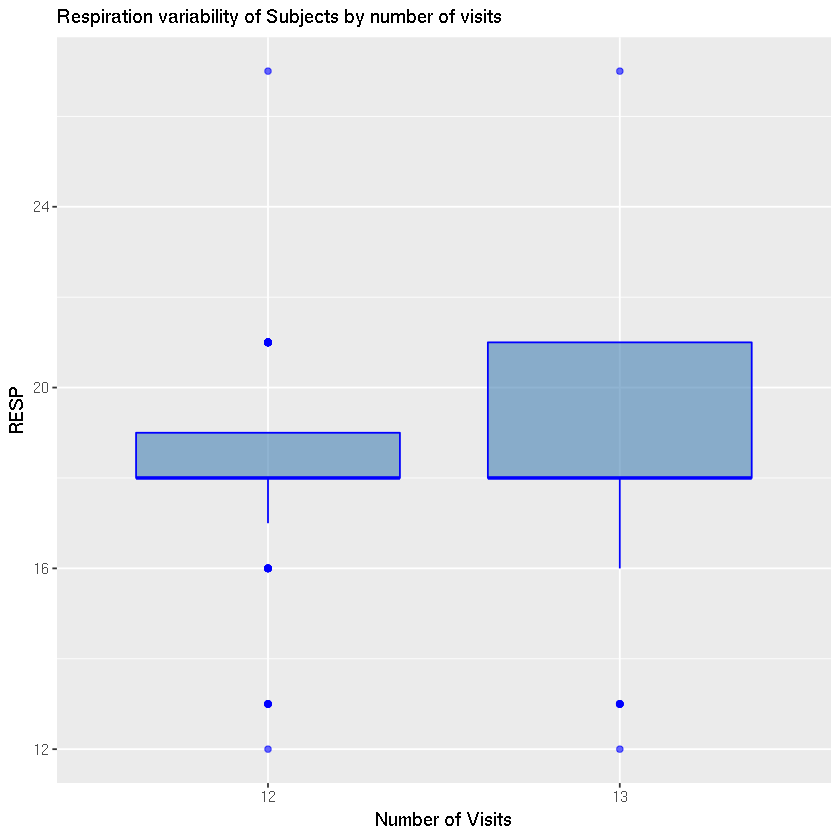

In [167]:
# REspiration outliers
q2 <- ggplot(df_VS.filtered, aes(x=VISIT_NUM, y=RESP)) 
q2 <- q2 + geom_boxplot(color="blue", fill="steelblue", alpha=0.6)
q2 <- q2 + labs(x="Number of Visits", y="RESP") +
      labs(title="Respiration variability of Subjects by number of visits")
print(q2)

In [13]:
resp1 <- subset(df_VS.filtered, VISIT_NUM == 12, select=c(RESP)) 
resp2 <- subset(df_VS.filtered, VISIT_NUM == 13, select=c(RESP)) 

    Q1 <- as.numeric(quantile(resp1$RESP, c(0.02, 0.98)))

   paste("Identifying Subjects with possible Outliers outside percentiles range between 2% and 98%")
   Output1 <- subset(df_VS.filtered, VISIT_NUM == 12 & (RESP < Q1[1] | RESP > Q1[2]), select=c(SITE, SUBJ, VISIT_NUM, RESP))
   print(Output1)

   paste("Results from outlier function.")
   outlier(resp1$RESP)
   outlier(resp1$RESP, opposite=TRUE)

# Compute sample Mean and StdDev
   data <- resp1$RESP
   paste('mean= ', round(mean(data), digits=2), ' stddev= ',round(sd(data), digits=2))

    Q2 <- as.numeric(quantile(resp2$RESP, c(0.02, 0.98)))

   paste("Identifying Subjects with possible Outliers outside percentiles renge between 2% and 98%")
   Output2 <- subset(df_VS.filtered, VISIT_NUM == 13 & (RESP < Q2[1] | RESP > Q2[2]), select=c(SITE, SUBJ, VISIT_NUM, RESP))
   print(Output2)

   paste("Results from outlier function.")
   outlier(resp2$RESP)
   outlier(resp2$RESP, opposite=TRUE)

# Compute sample Mean and StdDev
   data <- resp2$RESP
   paste('mean= ', round(mean(data), digits=2), ' stddev= ',round(sd(data), digits=2))


[1] "Identifying Subjects with possible Outliers outside percentiles range between 2% and 98%"

     SITE SUBJ VISIT_NUM RESP
6141 1497 4287        12   12
6582 1742 4473        12   27


[1] "Results from outlier function."

[1] 27

[1] 12

[1] "mean=  18.28  stddev=  2.12"

[1] "Identifying Subjects with possible Outliers outside percentiles renge between 2% and 98%"

     SITE SUBJ VISIT_NUM RESP
6030 1497 4542        13   12
7083 1742 5184        13   27


[1] "Results from outlier function."

[1] 27

[1] 12

[1] "mean=  18.51  stddev=  2.26"

'data.frame':	166 obs. of  1 variable:
 $ RESP: int  16 17 16 16 17 16 16 19 18 18 ...
'data.frame':	142 obs. of  1 variable:
 $ RESP: int  16 16 18 18 21 21 21 18 21 21 ...


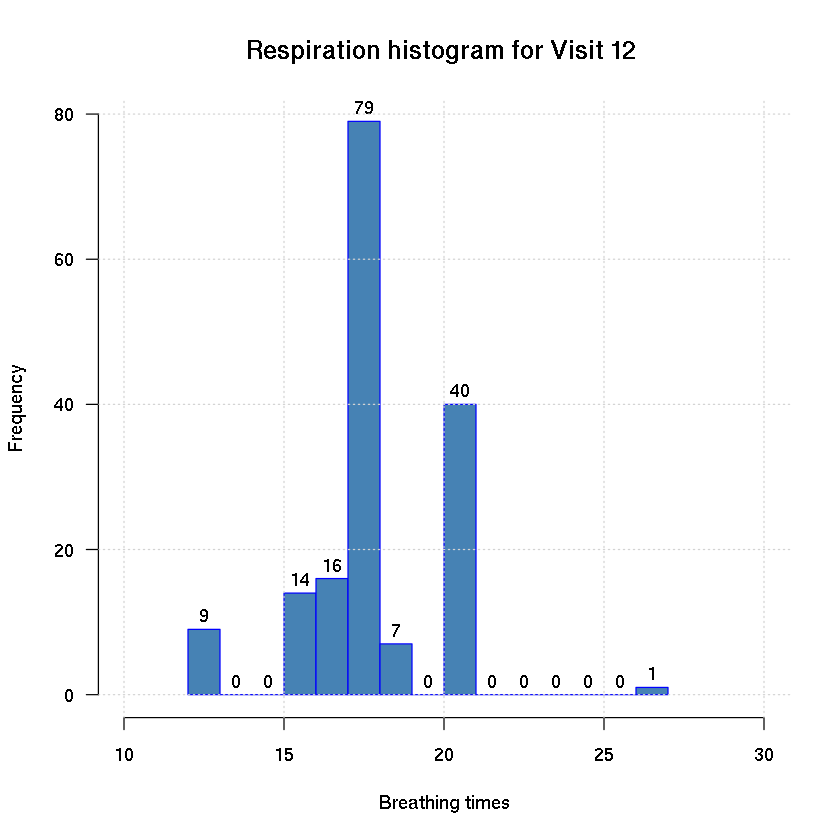

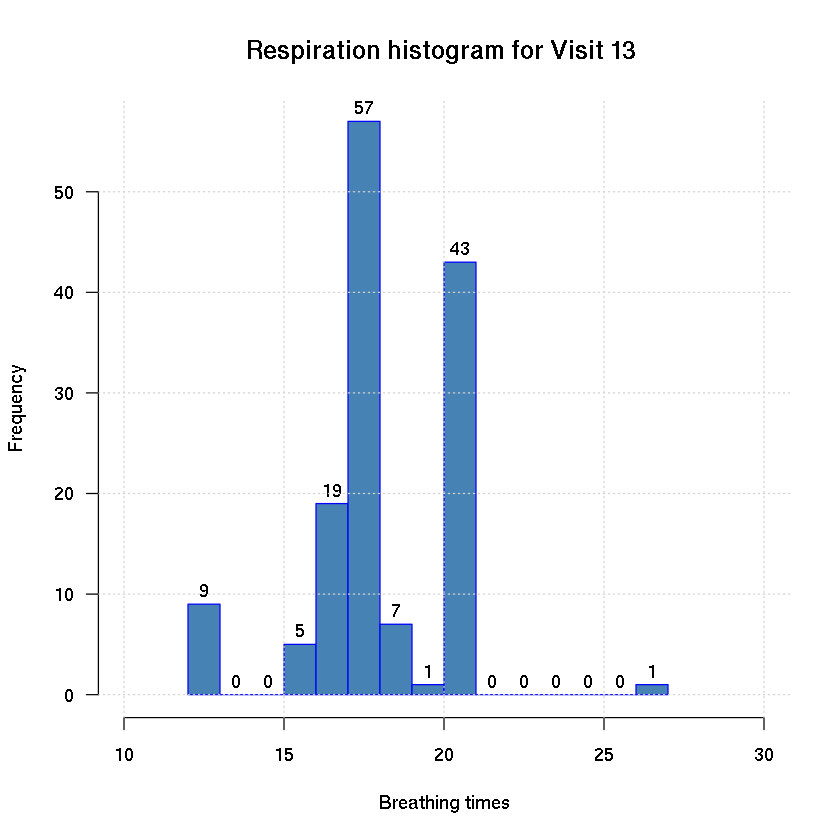

In [34]:
str(resp1)
str(resp2)

# Plot histograms to see data frequency distribution
hist(resp1$RESP, 
     main="Respiration histogram for Visit 12 ", 
     xlab="Breathing times", 
     border="blue", 
     col="steelblue",
     xlim=c(10,30),
     las=1, 
     breaks=12, labels = TRUE)
     grid()

hist(resp2$RESP, 
     main="Respiration histogram for Visit 13 ", 
     xlab="Breathing times", 
     border="blue", 
     col="steelblue",
     xlim=c(10,30),
     las=1, 
     breaks=12, labels = TRUE)
     grid()

### Respiration Outliers

This set of data looks very odd. The boxplots are very skewed-. 
The histograms are very similar in values. Even the outliers are equal. 
The probability of having two sets of data with almost the same mean and standard deviation is very small. 

It maybe depends on the way pulses are counted if by device or manualy. 

This datasets need further inquiry. 



In [143]:
# Create a correlatyion heatmap
df_VS_work <- df_VS.filtered[, c(3,8,10,12,14,20,21)]
df_VS_work$VISIT_NUM <- as.numeric(df_VS_work$VISIT_NUM)
#df_VS_work$SUBJ <- as.numeric(df_VS_work$SUBJ)
str(df_VS_work)
head(df_VS_work)

'data.frame':	308 obs. of  7 variables:
 $ VISIT_NUM: num  7 7 7 7 8 7 7 8 7 7 ...
 $ PULSE    : int  74 90 70 75 80 67 102 96 80 77 ...
 $ RESP     : int  16 17 16 16 16 17 16 16 16 19 ...
 $ SYSTOL   : int  121 130 147 135 135 121 129 119 130 119 ...
 $ DIAST    : int  76 87 93 95 95 74 86 85 93 82 ...
 $ TEMP_F   : num  98.4 98.4 98.4 100 99.1 97.9 99.5 98.5 98.6 98.4 ...
 $ WT_LB    : num  202 179 214 172 168 ...


,VISIT_NUM,PULSE,RESP,SYSTOL,DIAST,TEMP_F,WT_LB
11,7,74,16,121,76,98.4,202.2
29,7,90,17,130,87,98.4,178.6
55,7,70,16,147,93,98.4,213.6
80,7,75,16,135,95,100.0,172.4
92,8,80,16,135,95,99.1,167.9
117,7,67,17,121,74,97.9,136.2


In [144]:
cormat <- round(cor(df_VS_work, use="p"),2)
#cormat <- round(cor(df_VS_work[sapply(df_VS_work, is.numeric)]),2)

# Get lower triangle of the correlation matrix
  get_lower_tri<-function(cormat){
    cormat[upper.tri(cormat)] <- NA
    return(cormat)
  }
  # Get upper triangle of the correlation matrix
  get_upper_tri <- function(cormat){
    cormat[lower.tri(cormat)]<- NA
    return(cormat)
  }
upper_tri <- get_upper_tri(cormat)

# Melt the correlation matrix
#library(reshape2)
melted_cormat <- melt(upper_tri, na.rm = TRUE)


In [118]:
cormat

,VISIT_NUM,PULSE,RESP,SYSTOL,DIAST,TEMP_F,WT_LB
VISIT_NUM,1.00,-0.02,0.05,0.07,0.07,-0.04,-0.01
PULSE,-0.02,1.00,0.21,0.00,0.23,0.08,0.14
RESP,0.05,0.21,1.00,0.00,0.12,0.17,0.06
SYSTOL,0.07,0.00,0.00,1.00,0.62,-0.12,0.26
DIAST,0.07,0.23,0.12,0.62,1.00,-0.06,0.28
TEMP_F,-0.04,0.08,0.17,-0.12,-0.06,1.00,0.00
WT_LB,-0.01,0.14,0.06,0.26,0.28,0.00,1.00


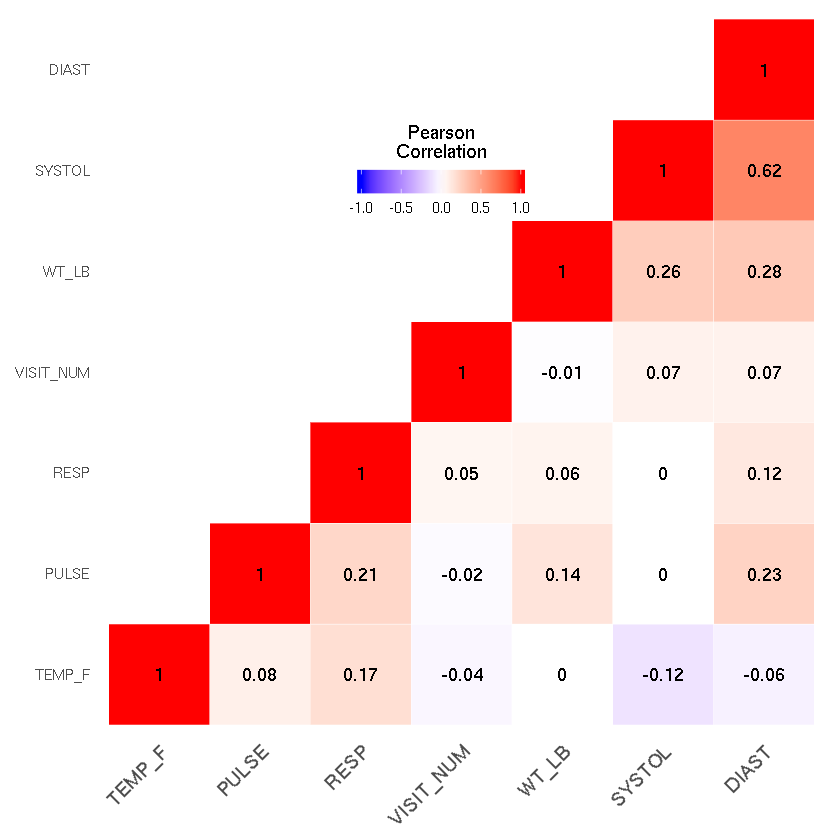

In [119]:
#d3heatmap(tbl_ready,Rowv = FALSE, Colv=FALSE)
reorder_cormat <- function(cormat){
# Use correlation between variables as distance
dd <- as.dist((1-cormat)/2)
hc <- hclust(dd)
cormat <-cormat[hc$order, hc$order]
}
# Reorder the correlation matrix
cormat <- reorder_cormat(cormat)
upper_tri <- get_upper_tri(cormat)
# Melt the correlation matrix
melted_cormat <- melt(upper_tri, na.rm = TRUE)
# Create a ggheatmap
ggheatmap <- ggplot(melted_cormat, aes(Var2, Var1, fill = value))+
 geom_tile(color = "white")+
 scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
   midpoint = 0, limit = c(-1,1), space = "Lab", 
    name="Pearson\nCorrelation") +
  theme_minimal()+ # minimal theme
 theme(axis.text.x = element_text(angle = 45, vjust = 1, 
    size = 12, hjust = 1))+
 coord_fixed()
# Print the heatmap
#print(ggheatmap)
# Now add text values 
ggheatmap <- ggheatmap + 
geom_text(aes(Var2, Var1, label = value), color = "black", size = 4) +
theme(
  axis.title.x = element_blank(),
  axis.title.y = element_blank(),
  panel.grid.major = element_blank(),
  panel.border = element_blank(),
  panel.background = element_blank(),
  axis.ticks = element_blank(),
  legend.justification = c(1, 0),
  legend.position = c(0.6, 0.7),
  legend.direction = "horizontal")+
  guides(fill = guide_colorbar(barwidth = 7, barheight = 1,
                title.position = "top", title.hjust = 0.5))
print(ggheatmap)

In [175]:
install.packages("outliers")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
